# Fitting routines

For all methods, the underlying package LMFIT handles the parabolic error calculations and passes along the optimization assignment to SciPy.

## Chisquare method

When fitting with the chisquare method, the costfunction to be minimized is

$$\chi^2 = \left(\frac{y_i-HFS(x_i)}{\sigma_i}\right)^2$$

with the subscript *i* referring to the datapoint, and *HFS* to the response of the :class:`.HFSModel` class. The algorithm used is the Levenberg-Marquardt algorithm, which gives quick results in a reliable fashion. The :func:`.fitting.chisquare_model` function creates the costfunction used for counting data. The function :func:`.fitting.chisquare_fit` performs the actual fit, while :func:`.fitting.chisquare_spectroscopic_fit` calculates the uncertainty on the data by taking the square root of the number of counts.

One of the options for :func:`.fitting.chisquare_model` is the keyword *func*. This applies the given function to the *fitvalue* to calculate the uncertainty on the datapoint. Setting this to the square root function mimics the use of the Poisson distribution instead of the Gaussian distribution for the uncertainty calculation.

In order to demonstrate the fit functions, toy data is needed. This is created by assuming some parameters for the basemodel, calculating the response, and then adding random noise.

C:\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
Chisquare fitting done: 96it [00:00, 774.15it/s]                       


True
Tolerance seems to be too small.
Scaled errors estimated from covariance matrix.
NDoF: 191, Chisquare: 243.70943, Reduced Chisquare: 1.2759656
[[Variables]]
    FWHMG:         12.2505546 +/- 2.776466 (22.66%) (init= 12.25163)
    FWHML:         7.54444319 +/- 2.544660 (33.73%) (init= 7.543783)
    TotalFWHM:     16.7770681 +/- 1.394659 (8.31%)  == '0.5346*FWHML+(0.2166*FWHML**2+FWHMG**2)**0.5'
    Scale:         96.8951275 +/- 6.935489 (7.16%) (init= 96.89334)
    Saturation:    0 (fixed)
    Amp0__1:       0.2380726 (fixed)
    Amp1__1:       0.1786341 (fixed)
    Amp1__2:       0.535743 (fixed)
    Amp2__1:       0.01191064 (fixed)
    Amp2__2:       0.1786448 (fixed)
    Amp2__3:       1 (fixed)
    Al:            99.0223550 +/- 1.029561 (1.04%) (init= 99.02318)
    Au:            199.356040 +/- 0.629877 (0.32%) (init= 199.3564)
    Bl:            101.393727 +/- 0.692640 (0.68%) (init= 101.3934)
    Bu:            200.771492 +/- 1.111849 (0.55%) (init= 200.7717)
    Cl:        

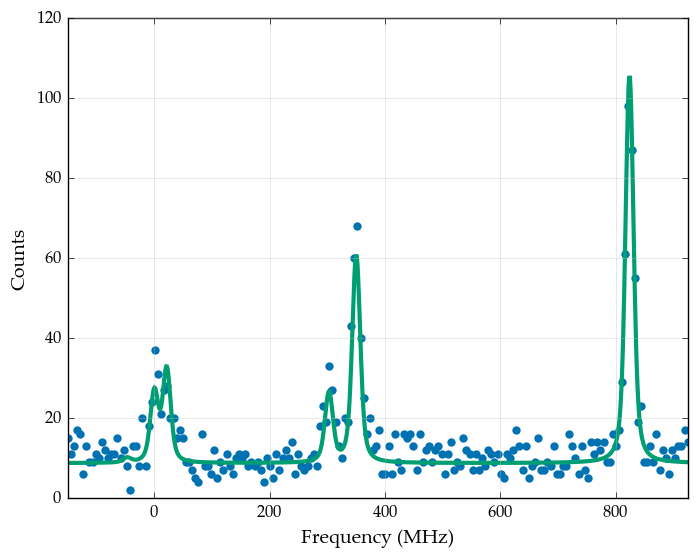

(<matplotlib.figure.Figure at 0x42afa20>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb6df7b8>)

In [1]:
%matplotlib inline

import satlas as s
import numpy as np
np.random.seed(0)  #Ensure the same random numbers each time

I = 1.0
J = [1.0, 2.0]

ABC = [100, 200, 100, 200, 0, 0]
fwhm = [10, 10]
centroid = 500
scale = 100

basemodel = s.HFSModel(I, J, ABC, centroid, fwhm=fwhm, scale=scale, background_params=[10], use_racah=True)

frequency_range = (min(basemodel.locations) - 100, max(basemodel.locations) + 100)
frequency_range = np.linspace(frequency_range[0], frequency_range[1], 200)

data = np.floor(basemodel(frequency_range) + basemodel(frequency_range)**0.5 * np.random.randn(len(frequency_range)))

success, message = s.chisquare_spectroscopic_fit(basemodel, frequency_range, data)
print(success)
print(message)
basemodel.display_chisquare_fit(show_correl=False)
basemodel.plot(x=frequency_range, y=data)

If *func=np.sqrt* is given to the fitfunction, the result is

Chisquare fitting done: 169it [00:00, 840.75it/s]                      


True
Tolerance seems to be too small.
Scaled errors estimated from covariance matrix.
NDoF: 191, Chisquare: 204.74572, Reduced Chisquare: 1.0719671
[[Variables]]
    FWHMG:         11.4046738 +/- 2.725470 (23.90%) (init= 11.40436)
    FWHML:         8.04079644 +/- 2.450016 (30.47%) (init= 8.040946)
    TotalFWHM:     16.3015565 +/- 1.350555 (8.28%)  == '0.5346*FWHML+(0.2166*FWHML**2+FWHMG**2)**0.5'
    Scale:         97.0921148 +/- 6.671372 (6.87%) (init= 97.09294)
    Saturation:    0 (fixed)
    Amp0__1:       0.2380726 (fixed)
    Amp1__1:       0.1786341 (fixed)
    Amp1__2:       0.535743 (fixed)
    Amp2__1:       0.01191064 (fixed)
    Amp2__2:       0.1786448 (fixed)
    Amp2__3:       1 (fixed)
    Al:            98.4445335 +/- 0.927717 (0.94%) (init= 98.44561)
    Au:            199.023678 +/- 0.568704 (0.29%) (init= 199.0244)
    Bl:            101.251169 +/- 0.636961 (0.63%) (init= 101.252)
    Bu:            200.907481 +/- 0.963299 (0.48%) (init= 200.9086)
    Cl:         

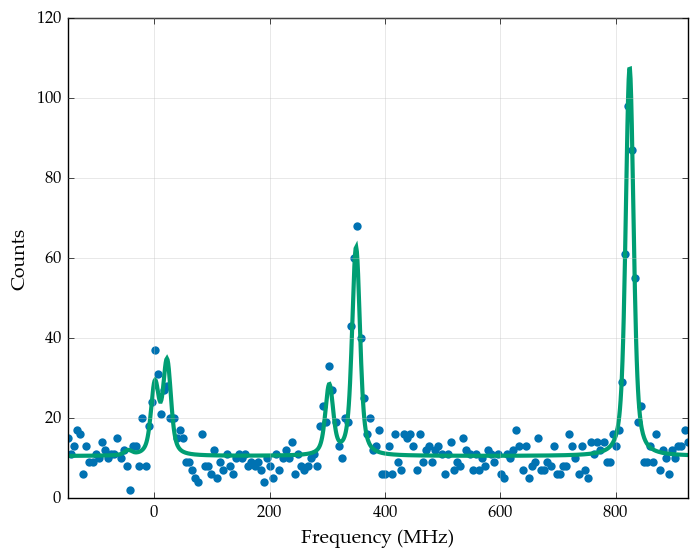

(<matplotlib.figure.Figure at 0xc4c1f60>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc1d9a20>)

In [2]:
basemodel = s.HFSModel(I, J, ABC, centroid, fwhm=fwhm, scale=scale, background_params=[50], use_racah=True)
success, message = s.chisquare_spectroscopic_fit(basemodel, frequency_range, data, func=np.sqrt)
print(success)
print(message)
basemodel.display_chisquare_fit(show_correl=False)
basemodel.plot(x=frequency_range, y=data)

which is slightly different.

## Maximum Likelihood Estimation

The Maximum Likelihood Estimation (MLE) can be used to derive the chisquare method in the case of Gaussian uncertainties. When this is not the case (as it is for counting data, which has a Poisson distribution), a less simplified method has to be used.

The MLE method works by minimizing the negative loglikelihood. This is calculated as

$$-\mathcal{L}\left(\vec{\theta}\middle|x, y, \sigma\right) = \sum_i logp\left(\vec{\theta}\middle|x_i, y_i, \sigma_i\right)$$

For the function *logp*, the standard choice is the loglikelihood derived from the Poisson distribution.

To use this method, the fitting routine code has to be changed to

Likelihood fitting done: 434it [00:00, 774.96it/s]                        


True
Optimization terminated successfully.
[[Variables]]
    FWHMG:         10.7541468 (init= 10.70806)
    FWHML:         8.61348269 (init= 8.705107)
    TotalFWHM:     16.0817743  == '0.5346*FWHML+(0.2166*FWHML**2+FWHMG**2)**0.5'
    Scale:         98.1004112 (init= 98.00073)
    Saturation:    0 (fixed)
    Amp0__1:       0.2380726 (fixed)
    Amp1__1:       0.1786341 (fixed)
    Amp1__2:       0.535743 (fixed)
    Amp2__1:       0.01191064 (fixed)
    Amp2__2:       0.1786448 (fixed)
    Amp2__3:       1 (fixed)
    Al:            98.6119935 (init= 98.63549)
    Au:            199.114212 (init= 199.1435)
    Bl:            101.382229 (init= 101.4291)
    Bu:            200.982154 (init= 201.0038)
    Cl:            0 (fixed)
    Cu:            0 (fixed)
    Centroid:      499.846731 (init= 499.8283)
    Background0:   9.94373112 (init= 9.936184)
    N:             0 (fixed)


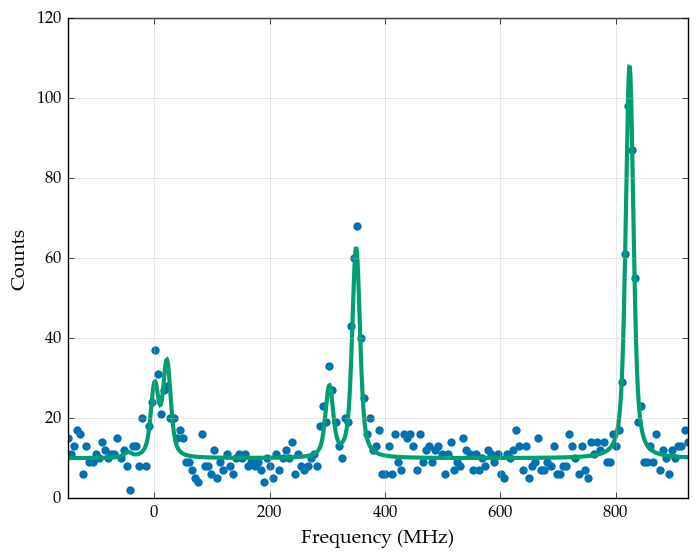

(<matplotlib.figure.Figure at 0xc23d128>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc226a20>)

In [3]:
basemodel = s.HFSModel(I, J, ABC, centroid, fwhm=fwhm, scale=scale, background_params=[10], use_racah=True)
success, message = s.likelihood_fit(basemodel, frequency_range, data)
print(success)
print(message)
basemodel.display_mle_fit(show_correl=False)
basemodel.plot(x=frequency_range, y=data)

The uncertainties on the parameters can be estimated using a random walk through parameter space, or the analytical boundaries can be calculated. The random walk is explained in another tutorial. To estimate the analytical bounds:

In [4]:
s.calculate_analytical_uncertainty(basemodel, frequency_range, data, method='mle')
basemodel.display_mle_fit(show_correl=False)

FWHMG (root found: 14.297834996937068): 65it [00:19,  1.12s/it]
FWHMG (root found: 8.830205423456569): 2it [00:14,  8.26s/it]
FWHML (root found: 10.228379560000752): 45it [00:15,  1.62s/it]
FWHML (root found: 5.36672904482987): 2it [00:25, 15.87s/it]
Scale (root found: 104.04783549916154): 15it [00:06,  1.15s/it]
Scale (root found: 90.92167038013845): 2it [00:09,  4.09s/it]
Al (root found: 99.30870987871776): 4it [00:05,  1.49s/it]
Al (root found: 97.57226133265965): 2it [00:05,  1.91s/it]
Au (root found: 199.54581096684223): 3it [00:03,  1.09s/it]
Au (root found: 198.46614783396336): 2it [00:04,  1.32s/it]
Bl (root found: 102.05958611540404): 4it [00:04,  1.38s/it]
Bl (root found: 100.62659507540516): 2it [00:04,  1.43s/it]
Bu (root found: 201.90007984610236): 3it [00:05,  1.74s/it]
Bu (root found: 200.04270539036145): 2it [00:02,  1.07it/s]
Centroid (root found: 500.33998405074846): 3it [00:04,  1.55s/it]
Centroid (root found: 499.386538431668): 2it [00:04,  1.77s/it]
Background0 (ro

[[Variables]]
    FWHMG:         10.9019676 +/- 3.395867 (31.15%) (init= 10.82603)
    FWHML:         8.45277063 +/- 3.086041 (36.51%) (init= 8.529065)
    TotalFWHM:     16.1088823  == '0.5346*FWHML+(0.2166*FWHML**2+FWHMG**2)**0.5'
    Scale:         98.0803022 +/- 7.158631 (7.30%) (init= 98.11402)
    Saturation:    0 (fixed)
    Amp0__1:       0.2380726 (fixed)
    Amp1__1:       0.1786341 (fixed)
    Amp1__2:       0.535743 (fixed)
    Amp2__1:       0.01191064 (fixed)
    Amp2__2:       0.1786448 (fixed)
    Amp2__3:       1 (fixed)
    Al:            98.5551182 +/- 0.982856 (1.00%) (init= 98.5831)
    Au:            199.070734 +/- 0.604586 (0.30%) (init= 199.0901)
    Bl:            101.352552 +/- 0.725957 (0.72%) (init= 101.3614)
    Bu:            200.975161 +/- 0.932456 (0.46%) (init= 200.9757)
    Cl:            0 (fixed)
    Cu:            0 (fixed)
    Centroid:      499.863041 +/- 0.476942 (0.10%) (init= 499.8571)
    Background0:   9.95439023 +/- 0.298604 (3.00%) (init= 9

By supplying a list of names under the *filter* keyword, the uncertainty on only certain parameters can be estimated.

Note that, due to the fact that a fit is performed for every calculated value for a parameter, the numbers given as the best fit might change slightly. Convergence is also not guaranteed, so warning messages might be displayed for some parameters.

# Fitting with literature values

When using the :meth:`.BaseModel.set_literature_values` method to take the known literature values into account, the fitting statistic is adjusted in the following way:
1. The chisquare calculation automatically adds the literature value as an extra datapoint, correctly incorporating this in the calculation of the degrees of freedom. The new chisquare formula is
$$\chi^2 = \sum_i \left(\frac{y_i-f\left(x_i\right)}{\sigma_i}\right)^2 + \sum_{params} \left(\frac{p_{lit}-p_{fit}}{\sigma_{lit}}\right)^2$$
1. In the likelihood calculation, a Gaussian prior for the specified parameters is used instead of a uniform one.

These methods are equivalent in the case of Gaussian distributions on the datapoints for the likelihood calculation.
